#Understand the Dataset and its features






In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np


In [94]:
# Load CSV file
df = pd.read_csv('Healthcare Providers.csv')

In [95]:
# View first few rows
df.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [97]:
print(df.head())

     index  National Provider Identifier  \
0  8774979                    1891106191   
1  3354385                    1346202256   
2  3001884                    1306820956   
3  7594822                    1770523540   
4   746159                    1073627758   

  Last Name/Organization Name of the Provider First Name of the Provider  \
0                                 UPADHYAYULA                  SATYASREE   
1                                       JONES                      WENDY   
2                                    DUROCHER                    RICHARD   
3                                     FULLARD                     JASPER   
4                                    PERROTTI                    ANTHONY   

  Middle Initial of the Provider Credentials of the Provider  \
0                            NaN                        M.D.   
1                              P                        M.D.   
2                              W                         DPM   
3                     

In [100]:
df.info

<bound method DataFrame.info of          index  National Provider Identifier  \
0      8774979                    1891106191   
1      3354385                    1346202256   
2      3001884                    1306820956   
3      7594822                    1770523540   
4       746159                    1073627758   
...        ...                           ...   
99995  3837311                    1386938868   
99996  2079360                    1215091327   
99997  8927965                    1902868185   
99998  8854571                    1891941183   
99999  3547535                    1356772156   

      Last Name/Organization Name of the Provider First Name of the Provider  \
0                                     UPADHYAYULA                  SATYASREE   
1                                           JONES                      WENDY   
2                                        DUROCHER                    RICHARD   
3                                         FULLARD                     J

In [102]:
print("\nMissing values and their percentages:")
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})
print(missing_data)


Missing values and their percentages:
                                                    Missing Values  Percentage
index                                                            0       0.000
National Provider Identifier                                     0       0.000
Last Name/Organization Name of the Provider                      0       0.000
First Name of the Provider                                    4255       4.255
Middle Initial of the Provider                               29331      29.331
Credentials of the Provider                                   7209       7.209
Gender of the Provider                                        4254       4.254
Entity Type of the Provider                                      0       0.000
Street Address 1 of the Provider                                 0       0.000
Street Address 2 of the Provider                             59363      59.363
City of the Provider                                             0       0.000
Zip Code of t

In [104]:
df["First Name of the Provider"].head()

0    SATYASREE
1        WENDY
2      RICHARD
3       JASPER
4      ANTHONY
Name: First Name of the Provider, dtype: object

In [106]:
# Ensure 'Average Medicare Allowed Amount' is numeric
df['Average Medicare Allowed Amount'] = pd.to_numeric(df['Average Medicare Allowed Amount'], errors='coerce')
df

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.587778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.730000,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.650000,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.500000,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.520000,40,19.539393939,19.057575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,NaN,PT,F,I,324 E BALTIMORE ST,NaN,...,97162,"Evaluation of physical therapy, typically 30 m...",N,20,20,20,85.372500,214,60.7255,62.2485
99996,2079360,1215091327,HAYNER,MARGARET,S,ARNP,F,I,645 NW 4TH ST,NaN,...,99213,Established patient office or other outpatient...,N,136,107,136,61.270000,144.05147059,30.006176471,37.040220588
99997,8927965,1902868185,VALENCIA,DANA,NaN,M.D.,M,I,3009 N BALLAS RD,SUITE 202B,...,93320,"Doppler ultrasound study of heart blood flow, ...",N,11,11,11,17.980000,109.54545455,14.09,14.62
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,NaN,NaN,F,I,2365 BOSTON POST RD,SUITE 201,...,G0008,Administration of influenza virus vaccine,N,12,12,12,30.540000,65,29.93,25.32


In [108]:
# # Drop rows with missing values in relevant columns
cleaned_data = df[['Provider Type', 'Gender of the Provider', 'Average Medicare Allowed Amount']].dropna()
# cleaned_data

In [110]:
# Save the cleaned data to a new CSV file 
cleaned_data.to_csv('cleaned_data.csv', index=False)

Example for seaborn


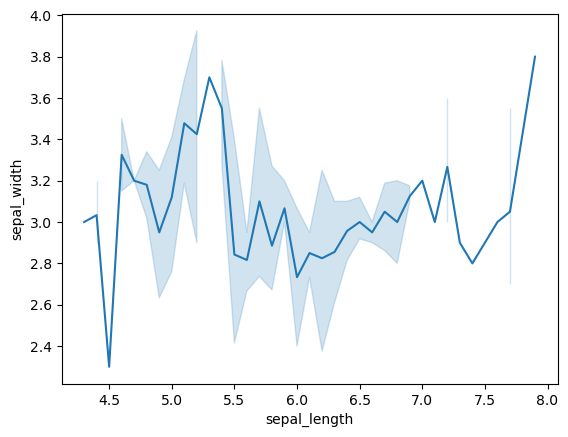

In [112]:
# Load the iris dataset
data = sns.load_dataset("iris")
print("Example for seaborn")
# Create a line plot
sns.lineplot(x="sepal_length", y="sepal_width", data=data)
plt.show()


1.Provider Demographics and Behavior

In [14]:
print(df['Provider Type'].unique())

['Internal Medicine' 'Obstetrics & Gynecology' 'Podiatry'
 'Physical Therapist in Private Practice' 'Diagnostic Radiology'
 'Family Practice' 'Clinical Laboratory' 'General Surgery'
 'Pain Management' 'Physician Assistant' 'Cardiology' 'Anesthesiology'
 'Gastroenterology' 'Psychiatry' 'Nurse Practitioner' 'General Practice'
 'Certified Registered Nurse Anesthetist (CRNA)'
 'Mass Immunizer Roster Biller' 'Critical Care (Intensivists)'
 'Audiologist' 'Allergy/ Immunology' 'Clinical Cardiac Electrophysiology'
 'Pulmonary Disease' 'Neurology' 'Orthopedic Surgery' 'Infectious Disease'
 'Medical Oncology' 'Geriatric Medicine' 'Chiropractic'
 'Emergency Medicine' 'Psychologist, Clinical' 'Interventional Cardiology'
 'Dermatology' 'Ambulatory Surgical Center' 'Ophthalmology'
 'Hematology-Oncology' 'Urology' 'Optometry' 'Vascular Surgery'
 'Pathology' 'Thoracic Surgery' 'Nephrology'
 'Physical Medicine and Rehabilitation' 'Neurosurgery'
 'Ambulance Service Provider' 'Centralized Flu' 'Otolaryng

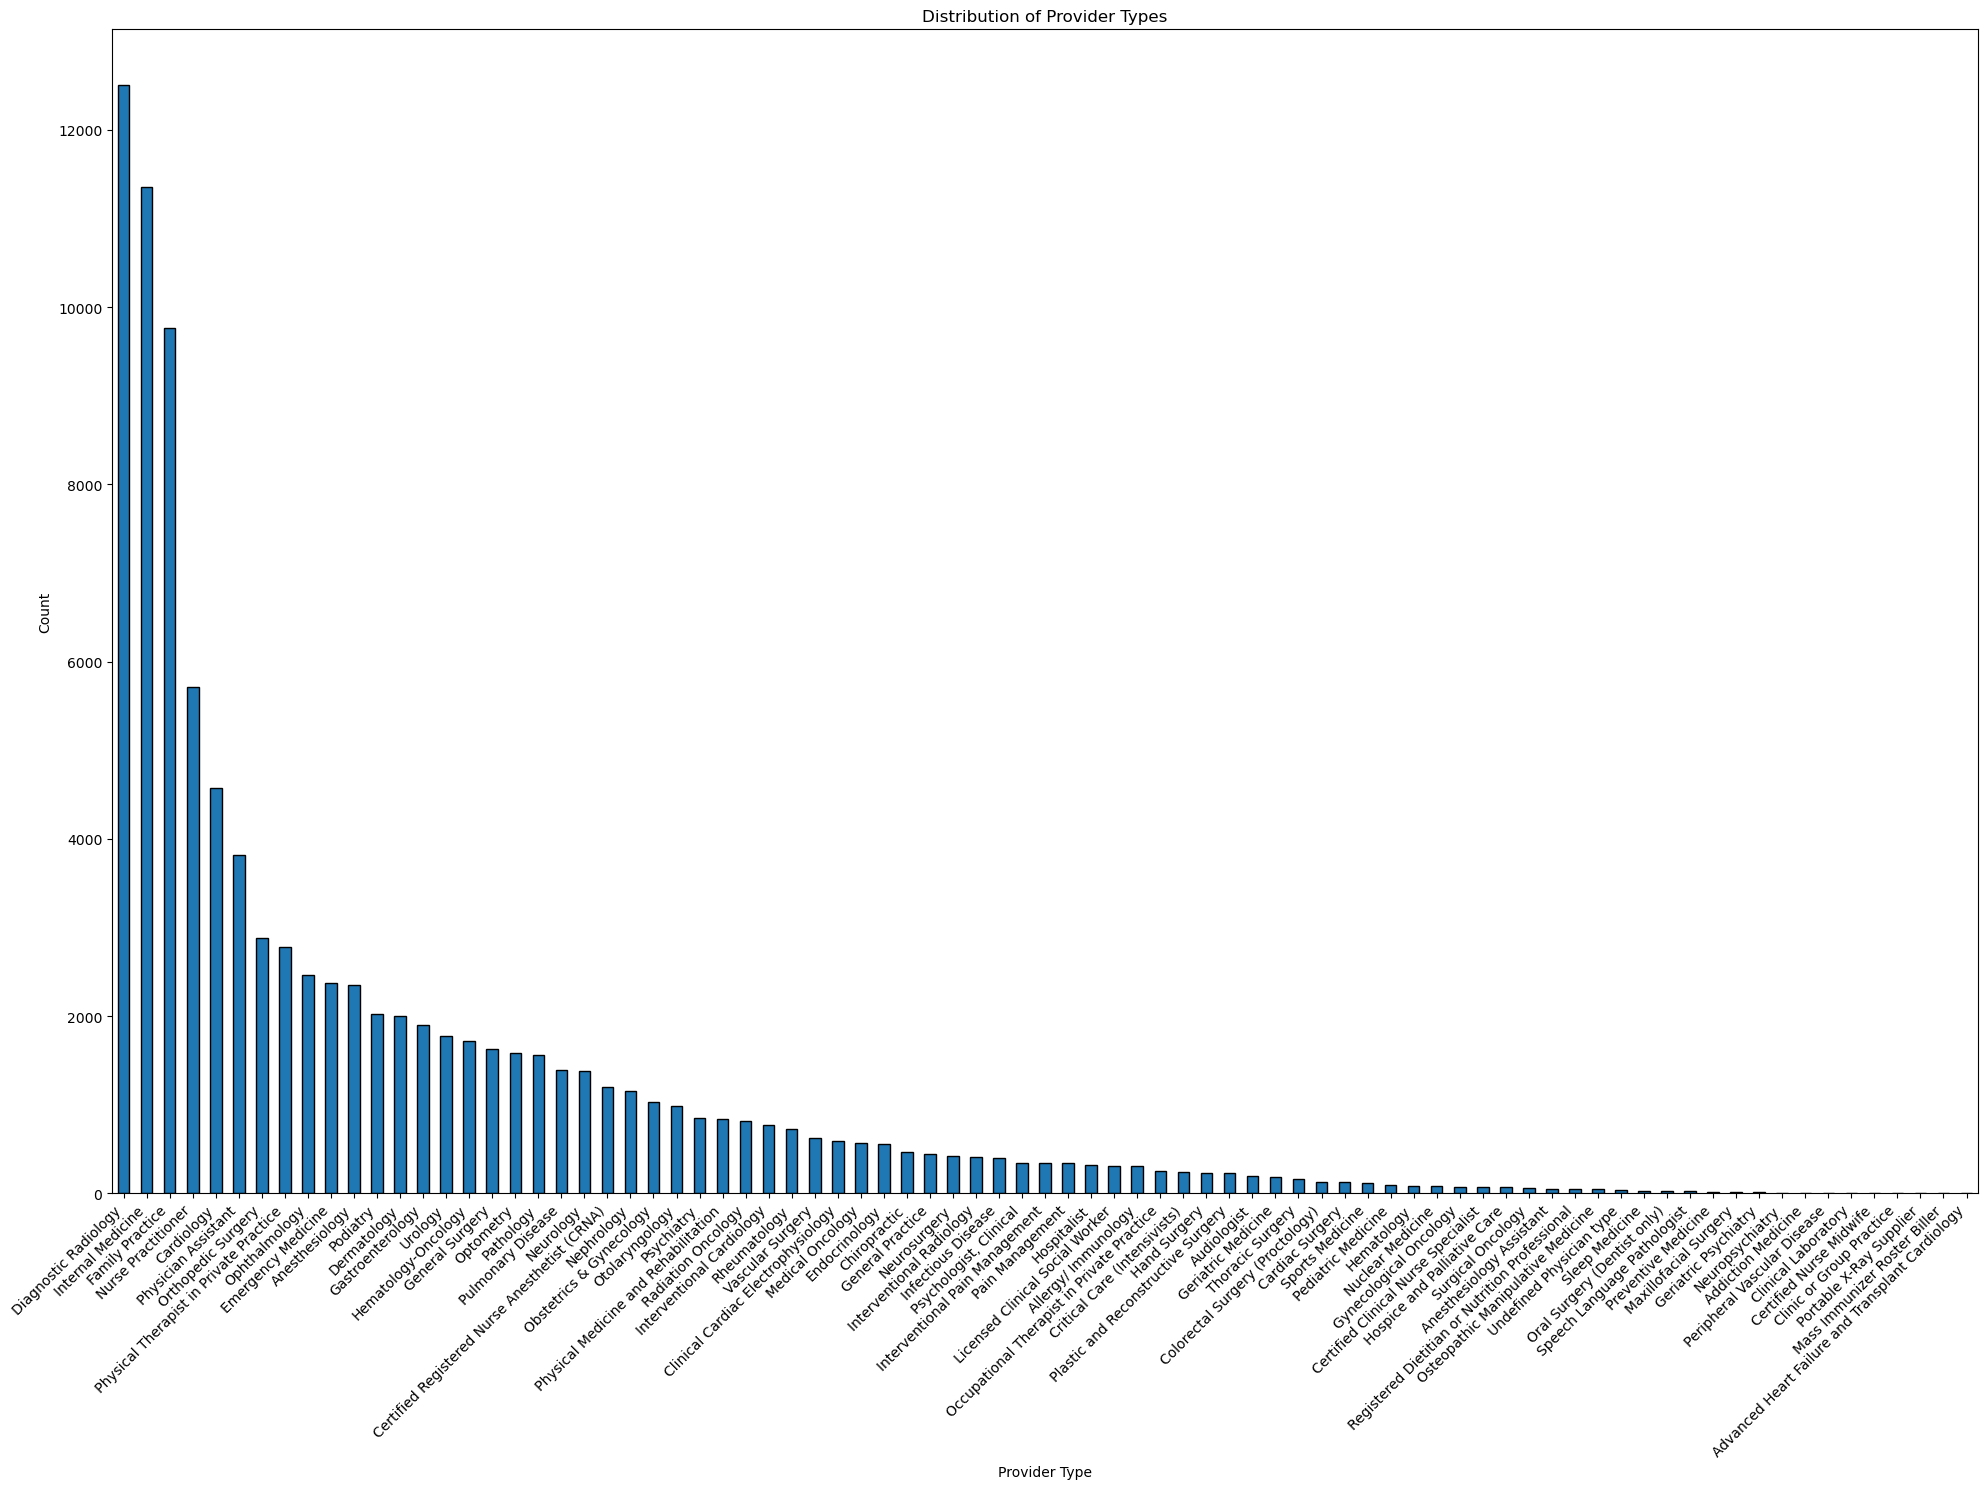

In [15]:
# Get counts of each provider type
# Analyze the distribution of different provider types (e.g., specialists, generalists).
provider_type_counts = cleaned_data['Provider Type'].value_counts()
plt.figure(figsize=(20, 15))
provider_type_counts.plot(kind='bar', edgecolor='black')
plt.title('Distribution of Provider Types')
plt.xlabel('Provider Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
#Identify the most common and rare types of providers.
most_common_providers = provider_type_counts.head(5) 
rare_providers = provider_type_counts.tail(5)
print("\n Common providers\n")
print(most_common_providers)
print("\n Rare providers\n")
print(rare_providers)


 Common providers

Provider Type
Diagnostic Radiology    12509
Internal Medicine       11358
Family Practice          9760
Nurse Practitioner       5713
Cardiology               4578
Name: count, dtype: int64

 Rare providers

Provider Type
Certified Nurse Midwife                             7
Clinic or Group Practice                            4
Portable X-Ray Supplier                             2
Mass Immunizer Roster Biller                        2
Advanced Heart Failure and Transplant Cardiology    1
Name: count, dtype: int64


In [17]:
print(df.columns)

Index(['index', 'National Provider Identifier',
       'Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider',
       'Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'Street Address 1 of the Provider',
       'Street Address 2 of the Provider', 'City of the Provider',
       'Zip Code of the Provider', 'State Code of the Provider',
       'Country Code of the Provider', 'Provider Type',
       'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code',
       'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services',
       'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')


In [18]:
df['Gender of the Provider'] = df['Gender of the Provider'].map({'M': 'Male', 'F': 'Female'}) 
# Gender Balance Analysis 
gender_counts = df['Gender of the Provider'].value_counts()
print(gender_counts)

Gender of the Provider
Male      66641
Female    29105
Name: count, dtype: int64


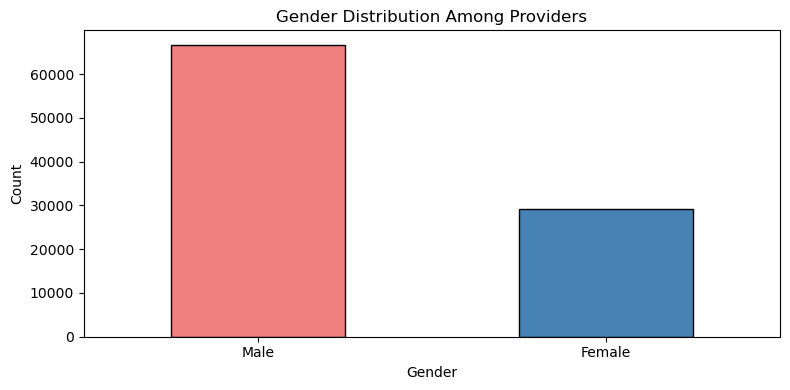

In [20]:
# Gender balance among providers
gender_counts = df['Gender of the Provider'].value_counts()
plt.figure(figsize=(8, 4))
gender_counts.plot(kind='bar', color=['lightcoral', 'steelblue'], edgecolor='black')
plt.title('Gender Distribution Among Providers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\Maaruboina Vamsi\AppData\Local\Temp\ipykernel_24008\1833083557.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


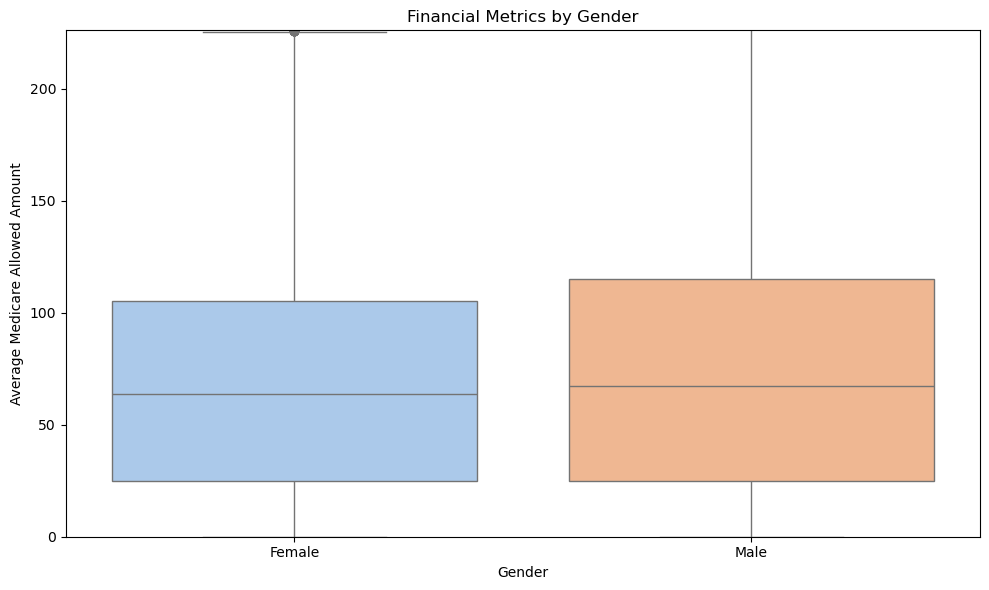

In [21]:


# Convert financial data to numeric and clean missing values
df['Average Medicare Allowed Amount'] = pd.to_numeric(
    df['Average Medicare Allowed Amount'], errors='coerce'
)
financial_by_gender = df[['Gender of the Provider', 'Average Medicare Allowed Amount']].dropna()


plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Gender of the Provider',
    y='Average Medicare Allowed Amount',
    data=financial_by_gender,
    palette='pastel'
)
plt.title('Financial Metrics by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Medicare Allowed Amount')
plt.ylim(0, financial_by_gender['Average Medicare Allowed Amount'].quantile(0.95)) 
plt.tight_layout()
plt.show()


2.Geographic Insights..

In [26]:
a=df['State Code of the Provider'].value_counts().head(5)
print(a)

State Code of the Provider
CA    7775
FL    7263
TX    6861
NY    6361
PA    4561
Name: count, dtype: int64


In [28]:
a=df['State Code of the Provider'].value_counts().tail(5)
print(a)

State Code of the Provider
GU    15
ZZ     6
AP     3
AE     2
AA     1
Name: count, dtype: int64


states with the highest and lowest provider counts


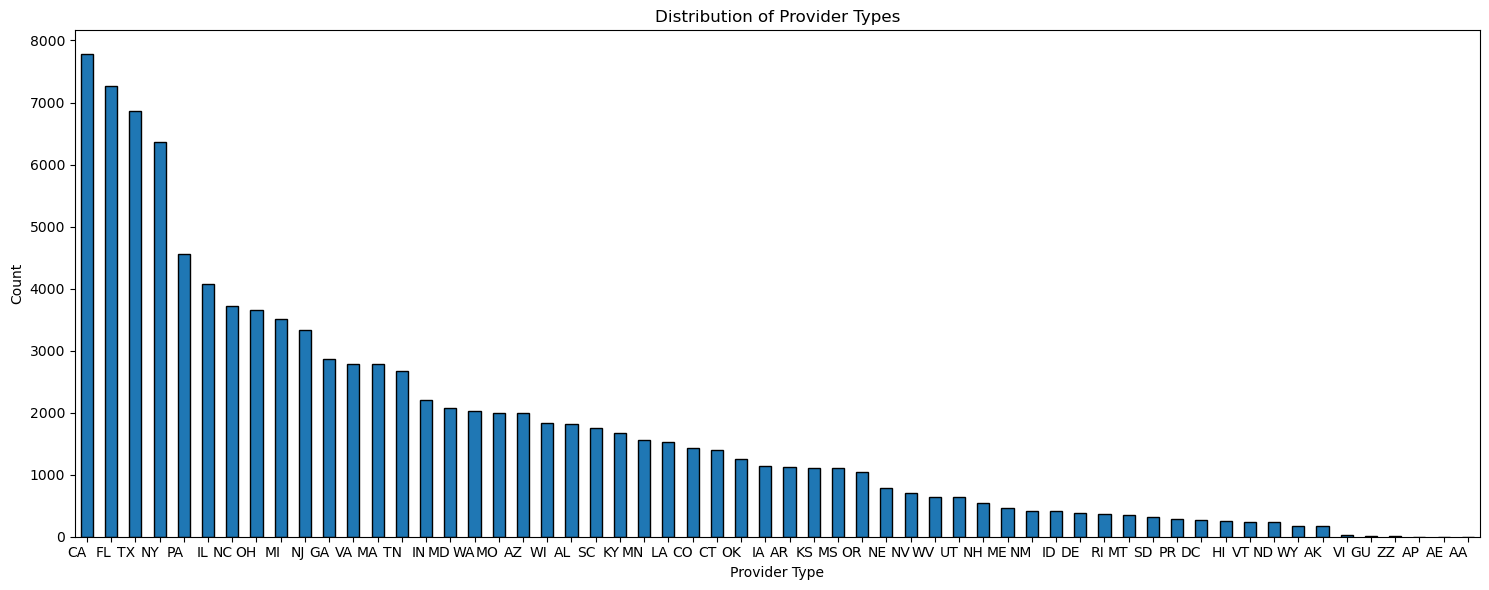

In [31]:
print("states with the highest and lowest provider counts")
# Get counts of each provider type
states_type_counts = df['State Code of the Provider'].value_counts()
plt.figure(figsize=(15, 6))
states_type_counts.plot(kind='bar', edgecolor='black')
plt.title('Distribution of Provider Types')
plt.xlabel('Provider Type')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

In [34]:
# Convert relevant columns to numeric, forcing errors to NaN
df['Average Medicare Allowed Amount'] = pd.to_numeric(df['Average Medicare Allowed Amount'], errors='coerce')
df['Number of Services'] = pd.to_numeric(df['Number of Services'], errors='coerce')

# Drop rows with NaN values in these columns
df = df.dropna(subset=['Average Medicare Allowed Amount', 'Number of Services'])



In [36]:
# Calculate state-level financial performance and service volume
state_financial_metrics = df.groupby('State Code of the Provider')[['Average Medicare Allowed Amount', 'Number of Services']].mean()



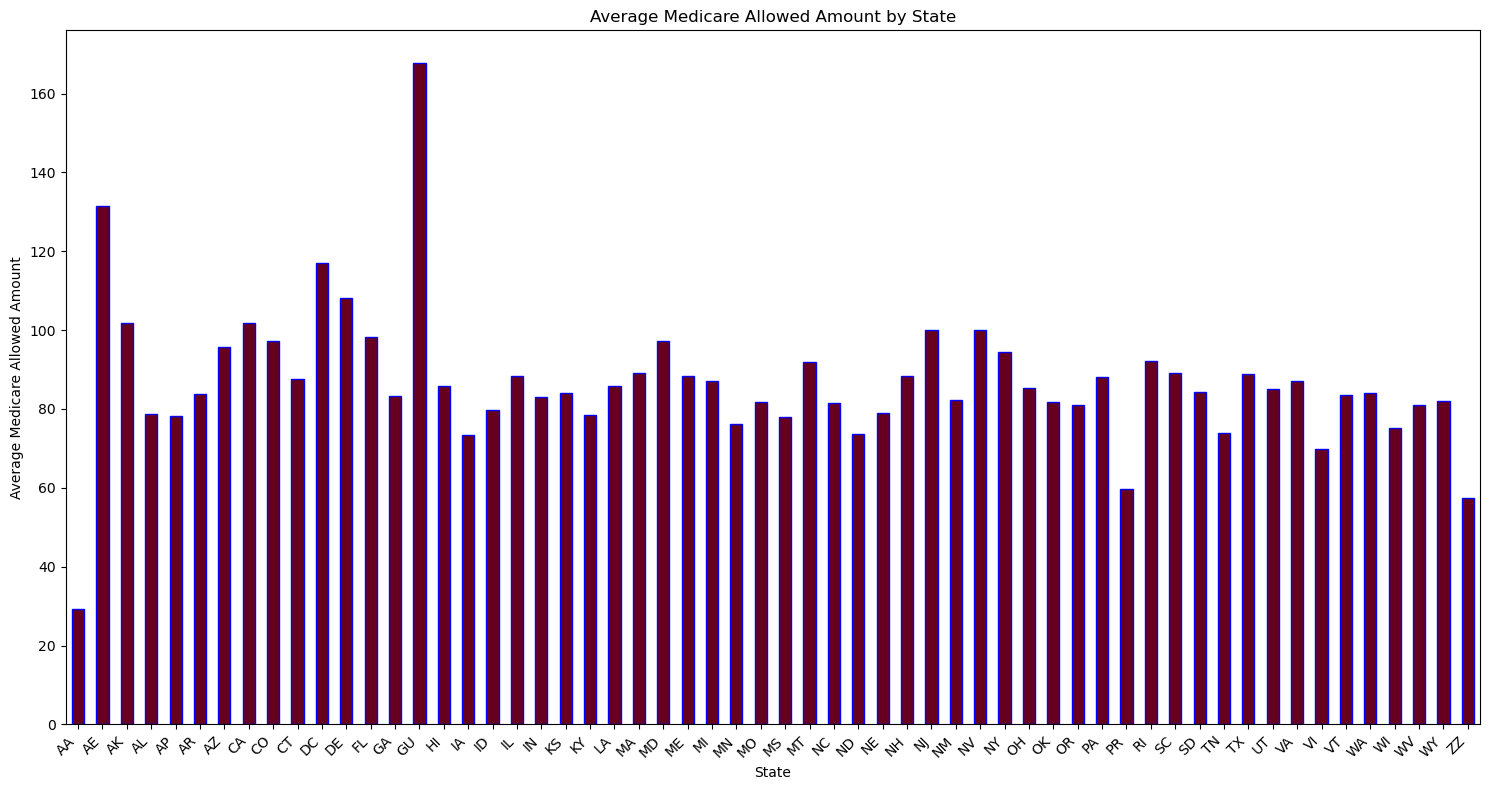

In [37]:
# Bar chart for state-level financial performance
plt.figure(figsize=(15, 8))
state_financial_metrics['Average Medicare Allowed Amount'].plot(kind='bar', edgecolor='blue', colormap='RdBu')
# plt.figure(figsize=(20, 6))
plt.title('Average Medicare Allowed Amount by State')
plt.xlabel('State')
plt.ylabel('Average Medicare Allowed Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



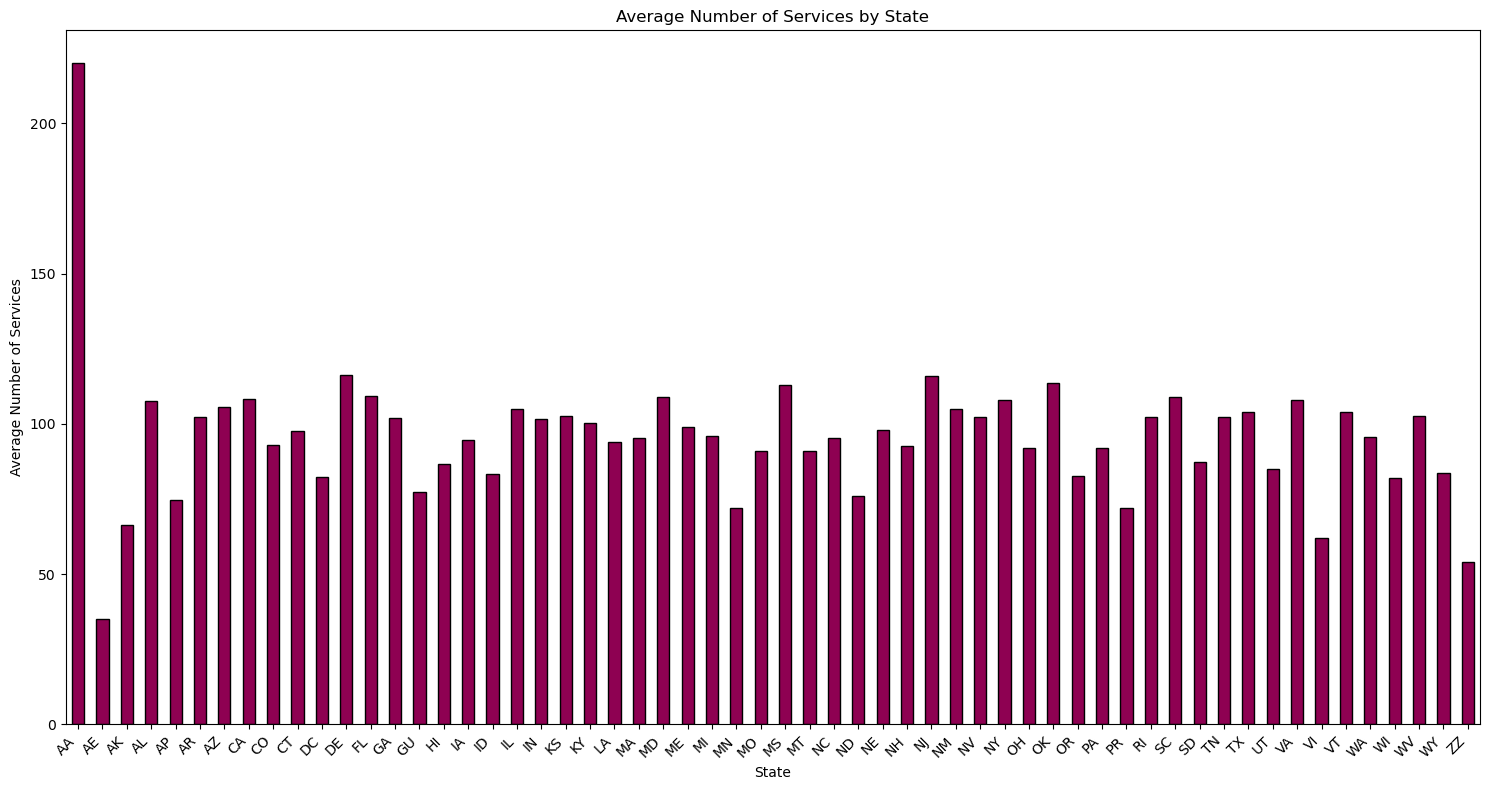

In [38]:
# Bar chart for state-level service volume
plt.figure(figsize=(15, 8))
state_financial_metrics['Number of Services'].plot(kind='bar', edgecolor='black', colormap='PiYG')
plt.title('Average Number of Services by State')
plt.xlabel('State')
plt.ylabel('Average Number of Services')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [39]:
a=df['City of the Provider'].value_counts().head(5)
print(a)

City of the Provider
NEW YORK        1025
HOUSTON          844
CHICAGO          740
PHILADELPHIA     637
BOSTON           624
Name: count, dtype: int64


In [40]:
a=df['City of the Provider'].value_counts().tail(5)
print(a)

City of the Provider
FT LEE        1
NEEDVILLE     1
WISHEK        1
ROUNDUP       1
HOOPER BAY    1
Name: count, dtype: int64


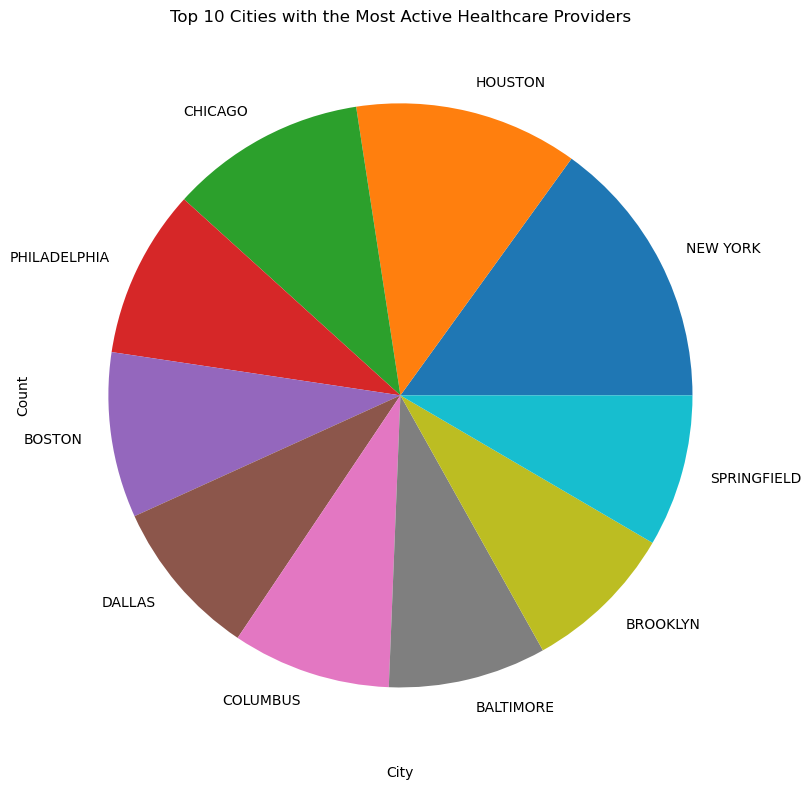

In [43]:
# Get the counts of providers in each city
city_counts = df['City of the Provider'].value_counts().head(10)
# Bar chart for provider counts by city
plt.figure(figsize=(15, 8))
city_counts.plot(kind='pie')
plt.title('Top 10 Cities with the Most Active Healthcare Providers')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [44]:
# Group by state and calculate the mean service cost
city_service_costs = df.groupby('City of the Provider')['Average Medicare Allowed Amount'].mean()

In [45]:
highest_service_costs = city_service_costs.nlargest(5) 
lowest_service_costs = city_service_costs.nsmallest(5) 


print("Regions with the Highest Service Costs:") 
print(highest_service_costs) 


print("\nRegions with the Lowest Service Costs:") 
print(lowest_service_costs)

Regions with the Highest Service Costs:
City of the Provider
ACME              937.020000
BAILEYVILLE       850.000000
IRWINDALE         818.941777
ATLANTIC BEACH    751.410000
TAMAQUA           544.543922
Name: Average Medicare Allowed Amount, dtype: float64

Regions with the Lowest Service Costs:
City of the Provider
FRANKENMUTH    0.050000
WILDWOOD       0.050000
DEMOPOLIS      0.088993
CITRONELLE     0.113750
FT BRANCH      0.116389
Name: Average Medicare Allowed Amount, dtype: float64


In [ ]:
# Bar chart for average Medicare allowed amount by city
plt.figure(figsize=(15, 6))
city_service_costs.plot(kind='bar', edgecolor='black', colormap='cividis')
plt.title('Average Medicare Allowed Amount by City')
plt.xlabel('City',labelpad=70)
plt.ylabel('Average Medicare Allowed Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



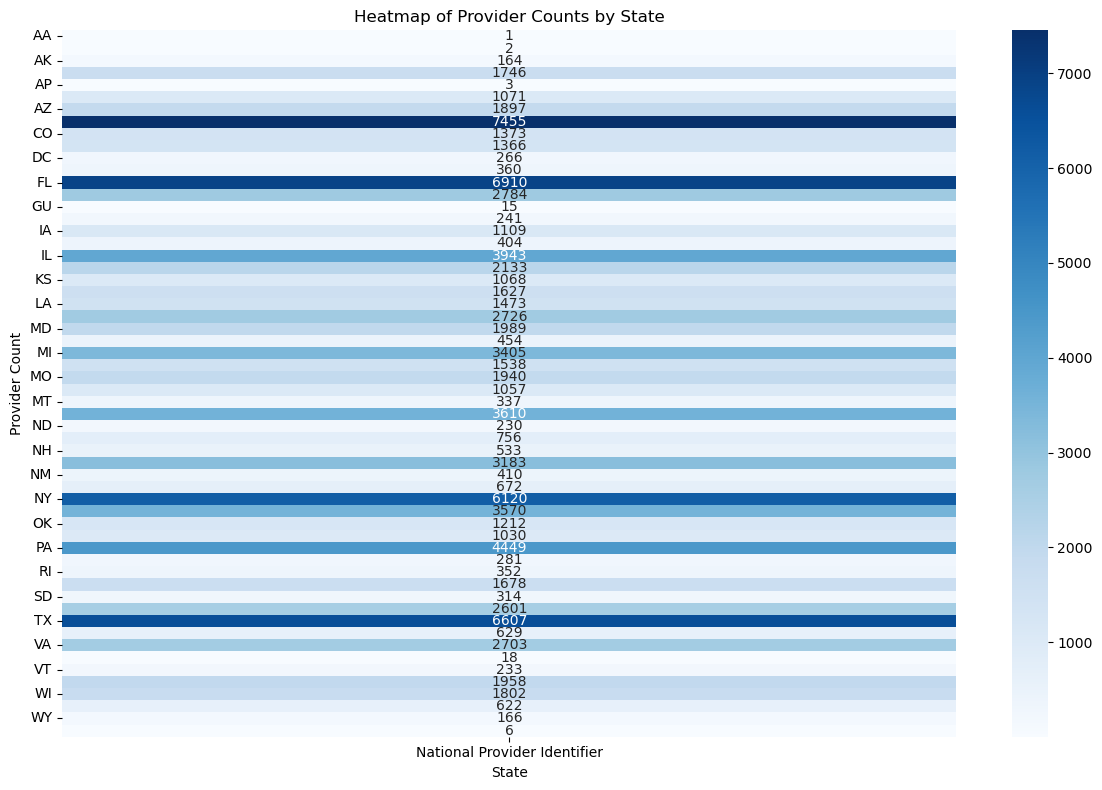

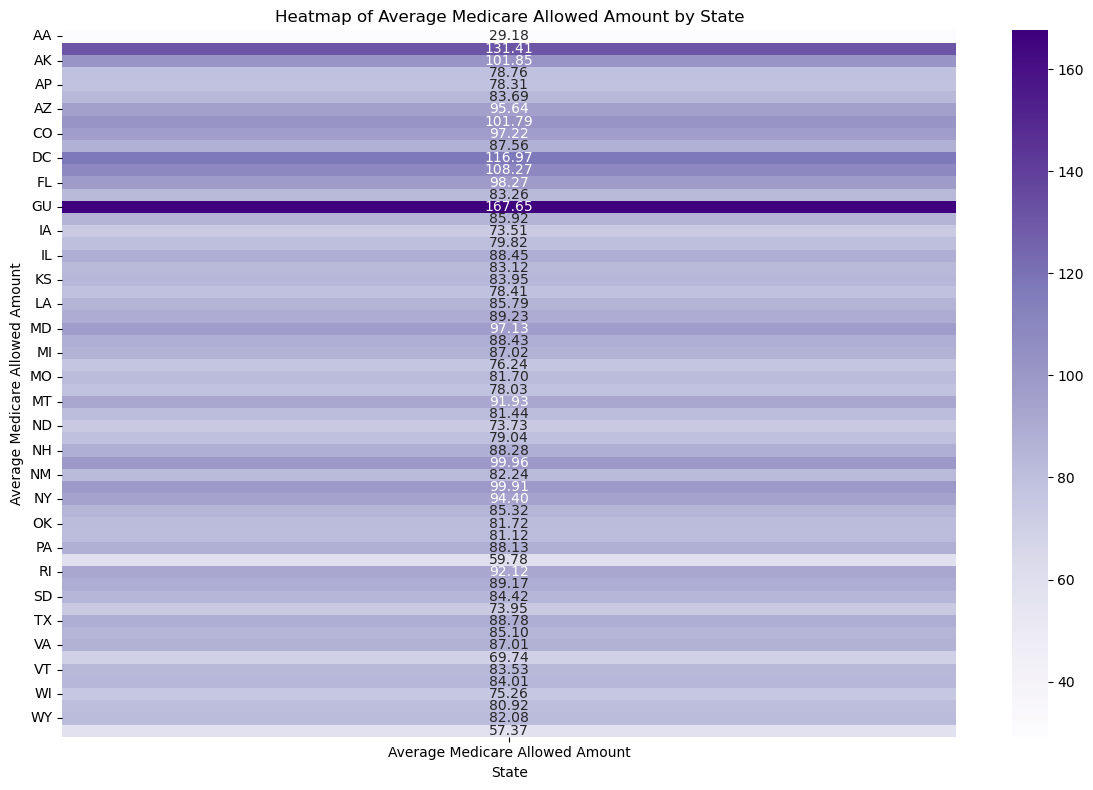

In [88]:
# Pivot the data for heatmap
provider_heatmap_data = df.pivot_table(index='State Code of the Provider', values='National Provider Identifier', aggfunc='count')
payment_heatmap_data = df.pivot_table(index='State Code of the Provider', values='Average Medicare Allowed Amount', aggfunc='mean')

# Heatmap for provider counts by state
plt.figure(figsize=(12, 8))
sns.heatmap(provider_heatmap_data, cmap='Blues', annot=True, fmt='g')
plt.title('Heatmap of Provider Counts by State')
plt.xlabel('State')
plt.ylabel('Provider Count')
plt.tight_layout()
plt.show()

# Heatmap for average Medicare allowed amount by state
plt.figure(figsize=(12, 8))
sns.heatmap(payment_heatmap_data, cmap='Purples', annot=True, fmt='.2f')
plt.title('Heatmap of Average Medicare Allowed Amount by State')
plt.xlabel('State')
plt.ylabel('Average Medicare Allowed Amount')
plt.tight_layout()
plt.show()


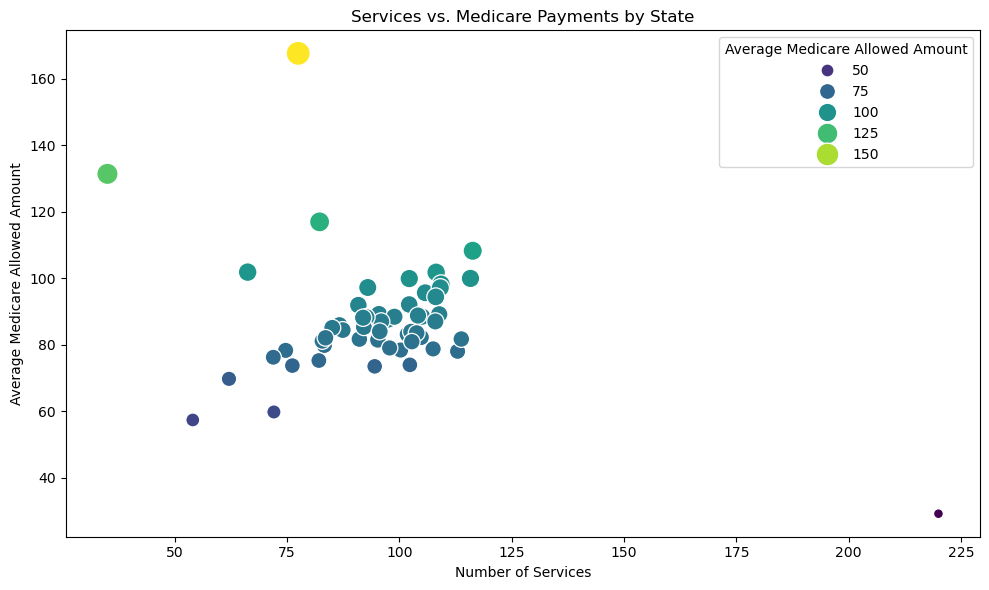

In [114]:
# Scatter plot for services vs. Medicare payments
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=state_financial_metrics,
    x='Number of Services',
    y='Average Medicare Allowed Amount',
    hue='Average Medicare Allowed Amount',
    palette='viridis',
    size='Average Medicare Allowed Amount',
    sizes=(50, 300)
)
plt.title('Services vs. Medicare Payments by State')
plt.xlabel('Number of Services')
plt.ylabel('Average Medicare Allowed Amount')
plt.tight_layout()
plt.show()


cities with the highest provider counts


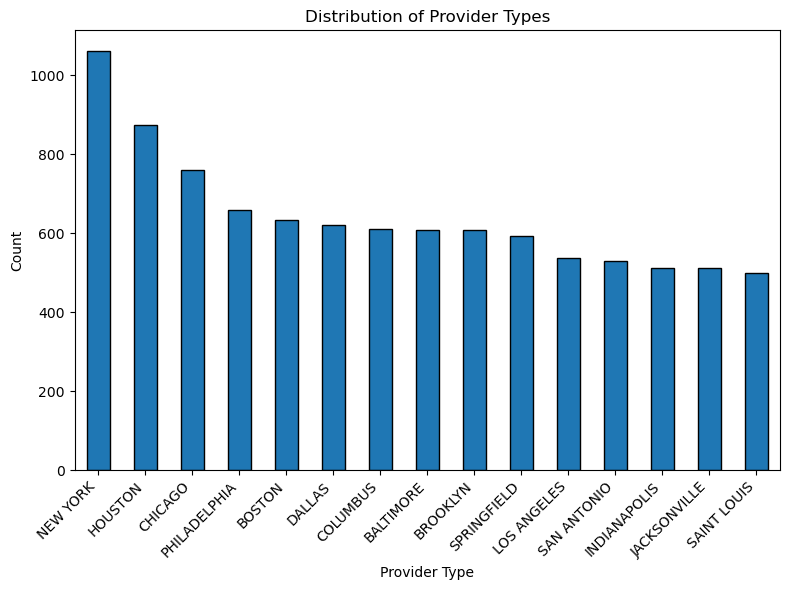

cities with the lowest provider counts


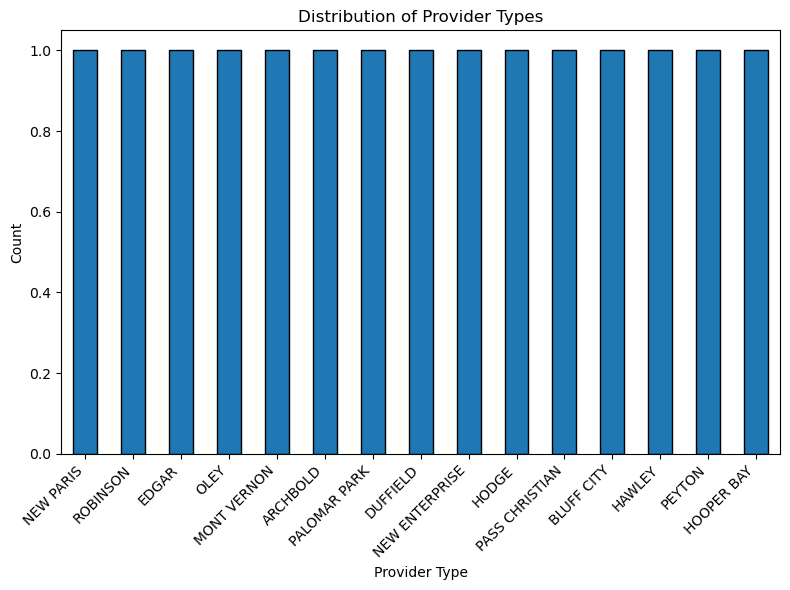

In [120]:
print("cities with the highest provider counts")
# Get counts of each provider type
states_type_counts = df['City of the Provider'].value_counts().head(15)
plt.figure(figsize=(8, 6))
states_type_counts.plot(kind='bar', edgecolor='black')
plt.title('Distribution of Provider Types')
plt.xlabel('Provider Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


print("cities with the lowest provider counts")
# Get counts of each provider type
states_type_counts = df['City of the Provider'].value_counts().tail(15)
plt.figure(figsize=(8, 6))
states_type_counts.plot(kind='bar', edgecolor='black')
plt.title('Distribution of Provider Types')
plt.xlabel('Provider Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [122]:
# Group by state and calculate the mean service cost
city_service_costs = df.groupby('City of the Provider')['Average Medicare Allowed Amount'].mean()
highest_service_costs = city_service_costs.nlargest(5) 
lowest_service_costs = city_service_costs.nsmallest(5) 


print("Regions with the Highest Service Costs:") 
print(highest_service_costs) 


print("\nRegions with the Lowest Service Costs:") 
print(lowest_service_costs)
print(city_service_costs.shape)

Regions with the Highest Service Costs:
City of the Provider
COLO. SPRINGS     977.485847
ACME              937.020000
BAILEYVILLE       850.000000
IRWINDALE         818.941777
ATLANTIC BEACH    751.410000
Name: Average Medicare Allowed Amount, dtype: float64

Regions with the Lowest Service Costs:
City of the Provider
FRANKENMUTH     0.050000
WILDWOOD        0.050000
CITRONELLE      0.113750
FT BRANCH       0.116389
ARIZONA CITY    0.116549
Name: Average Medicare Allowed Amount, dtype: float64
(5846,)
